In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

# Считываем JSON файл как словарь
with open('friends.json', 'r') as f:
    friends_dict = json.load(f)

# Создаем неориентированный граф при помощи библиотеки NetworkX
G = nx.Graph()

# Создаем датафрейм из данных CSV файла
df = pd.read_excel('dataframe.xlsx')

# Добавление вершин графа из значения колонки id датафрейма df
G.add_nodes_from(df['id'].values)

In [9]:
friends_dict = {int(key): value for key, value in friends_dict.items()}

# Добавление ребер в граф на основе словаря друзей
for user_id, friends in friends_dict.items():
    for friend_id in friends:
        if np.isin(friend_id, list(friends_dict.keys())):
            G.add_edge(user_id, friend_id)

In [10]:
a = [1,2,3,4]

if 1 in a:
    print('sfgdf')

sfgdf


In [11]:
# Вывод количества ребер графа
print("Количество ребер:", G.number_of_edges())
print("Количество вершин:", G.number_of_nodes())
G

Количество ребер: 14128
Количество вершин: 2083


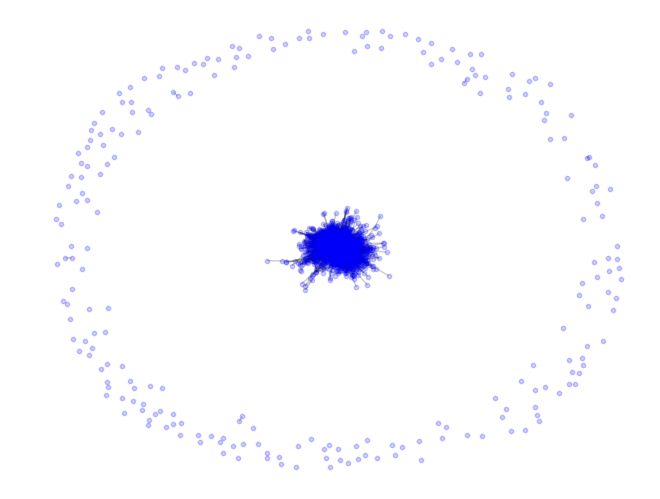

In [4]:
# Отрисовка графа
nx.draw(G, with_labels=False, alpha=0.2, width=1, node_size=10, node_color='blue')
plt.show()

In [12]:
# Вычисляем PageRank
pagerank = nx.pagerank(G)

# Сортируем вершины по значению PageRank в убывающем порядке
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Выводим список из 10 самых популярных вершин
top_vertices = [vertex for vertex, _ in sorted_pagerank[:10]]
print("Самые популярные вершины:", top_vertices)

Самые популярные вершины: [375852447, 201350084, 114941095, 615518884, 301403322, 330104901, 733177837, 159370664, 180779981, 189025553]


In [19]:
print(pagerank)

{425998: 0.00045733423651317677, 918325: 0.00010531283238425814, 1177043: 0.00010356579856137687, 1285451: 7.904305212816539e-05, 1434298: 7.904305212816539e-05, 1695795: 7.904305212816539e-05, 2500354: 0.00016635631705925612, 2949077: 7.904305212816539e-05, 3097224: 7.904305212816539e-05, 3131749: 7.904305212816539e-05, 3691898: 0.0002403576902398232, 3698363: 7.904305212816539e-05, 4883972: 7.904305212816539e-05, 5189375: 7.904305212816539e-05, 5404061: 7.904305212816539e-05, 5536770: 0.00010408586158064392, 6205966: 7.904305212816539e-05, 7877613: 0.00010306849501763175, 10406150: 7.904305212816539e-05, 11874530: 7.904305212816539e-05, 11916695: 0.0003407636637756413, 12339474: 7.904305212816539e-05, 14348785: 0.0001849173429198963, 14539013: 0.00027501982291094565, 20610942: 0.0007615113542871437, 21081827: 7.904305212816539e-05, 23079603: 0.0003799367601229041, 23415198: 7.904305212816539e-05, 24969366: 0.00020473075942124906, 26007539: 0.00025447811820500946, 29329539: 0.00042111

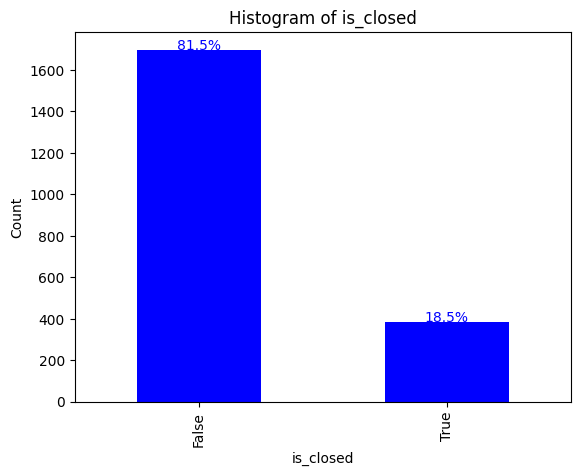

In [35]:
import matplotlib.pyplot as plt

# Группируем по колонке 'is_closed' и считаем количество значений True и False
counts = df['is_closed'].value_counts()

# Строим гистограмму
counts.plot(kind='bar', color = 'blue')

# Добавляем подписи осей и заголовок
plt.xlabel('is_closed')
plt.ylabel('Count')
plt.title('Histogram of is_closed')

# Добавляем подписи по количеству процентов от общего числа
total = counts.sum()
for i, count in enumerate(counts):
    percentage = count / total * 100
    plt.text(i, count + 1, f'{percentage:.1f}%', ha='center', color = 'blue')

# Отображаем гистограмму
plt.show()

In [7]:
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

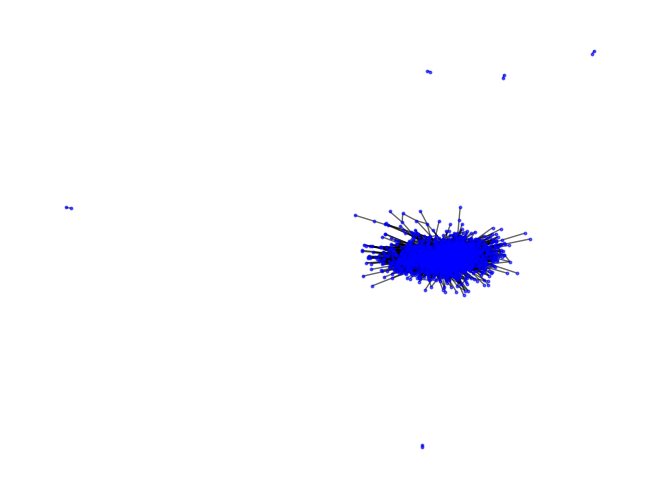

In [8]:
nx.draw(G, with_labels=False, alpha=0.6, width=1, node_size=3, node_color='blue')
plt.show()

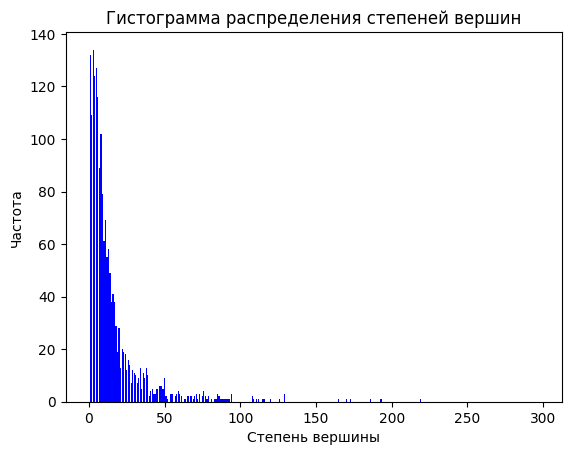

In [29]:
# Получение степеней вершин
degrees = [G.degree(node) for node in G.nodes()]

# Вывод гистограммы распределения степеней вершин
plt.hist(degrees, bins=range(max(degrees)), align='left', rwidth=0.8, color = 'blue')
plt.xlabel('Степень вершины')
plt.ylabel('Частота')
plt.title('Гистограмма распределения степеней вершин')
plt.show()

In [20]:
print(degrees)

{425998: 11, 918325: 1, 1177043: 1, 2500354: 3, 3691898: 5, 5536770: 1, 7877613: 1, 11916695: 10, 14348785: 4, 14539013: 6, 20610942: 27, 23079603: 9, 24969366: 5, 26007539: 6, 29329539: 8, 29715717: 60, 31058642: 18, 36077625: 18, 37276358: 60, 38031549: 5, 38771048: 71, 40096178: 20, 44400533: 8, 48519769: 30, 48883461: 2, 49709396: 4, 50255847: 5, 50387541: 1, 51047457: 6, 52122855: 11, 52535002: 6, 53200488: 4, 53508160: 7, 53789867: 72, 55006696: 1, 55480344: 1, 55549232: 8, 55640122: 2, 56615817: 4, 56689664: 7, 56855674: 5, 57247606: 6, 57626902: 5, 59284736: 2, 59374214: 112, 59711826: 54, 60058757: 50, 60287535: 7, 60527954: 3, 62743794: 9, 63447650: 1, 65027144: 38, 66764672: 5, 68648213: 6, 71076413: 11, 71117104: 10, 71276649: 5, 71465765: 26, 71835277: 9, 71872942: 15, 72121282: 28, 72555225: 8, 72950530: 4, 73219197: 3, 73927953: 9, 74374814: 6, 75168901: 4, 77668508: 13, 77866528: 94, 78500404: 48, 78810008: 20, 79805563: 11, 80814747: 16, 80888283: 73, 81448660: 14, 827

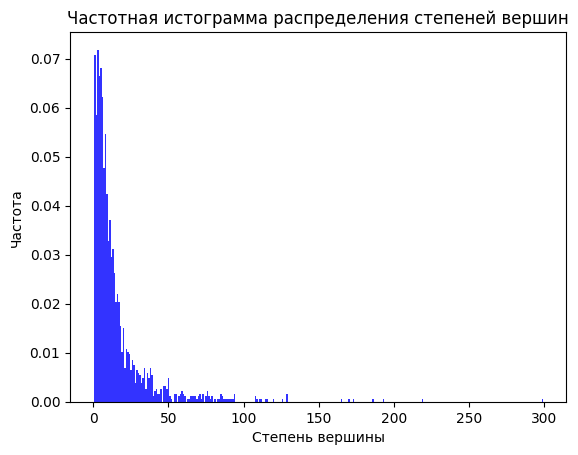

In [31]:
# Получаем распределение степеней вершин
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_sequence = list(filter(lambda x: x != 0, degree_sequence))

plt.hist(degree_sequence, bins=np.arange(max(degree_sequence)+2)-0.5, density=True, alpha=0.8, color='blue')
plt.xlabel('Степень вершины')
plt.ylabel('Частота')
plt.title('Частотная истограмма распределения степеней вершин')

plt.show()

In [11]:
from scipy.stats import expon
from scipy.optimize import minimize

# Определяем функцию правдоподобия для экспоненциального распределения
def exponential_likelihood(degree_sequence, lambd):
    n = len(degree_sequence)
    sum_log_xi = sum(np.log(degree_sequence))
    return n * np.log(lambd) - lambd * sum_log_xi

# Ищем параметр lambda, при котором функция правдоподобия достигает максимума
def lambd(degree_sequence):
    result = minimize(lambda x: -exponential_likelihood(degree_sequence, x), x0=1.0, method='Nelder-Mead')
    lambda_opt = result.x[0]
    return lambda_opt

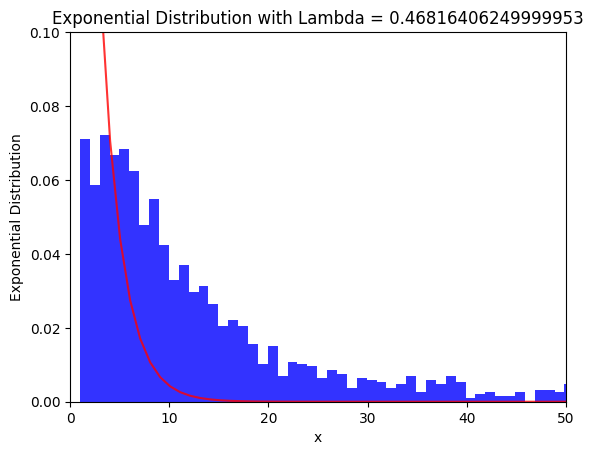

In [34]:
#Создаем pdf для экспоненциального распределения
def exponential_distribution(lmbda, x):
    return lmbda * np.exp(-lmbda * x)

# Задаем диапазон значений для построения графика
x = np.linspace(0, 100, 100)

# Вычисляем значения функции экспоненциального распределения для каждого значения x
y = exponential_distribution(lambd(degree_sequence), x)

# Строим график
plt.plot(x, y, color='r', alpha=0.8)
plt.hist(degree_sequence, bins=max(degree_sequence), density=True, alpha=0.8, color='blue')
plt.xlabel('x')
plt.ylabel('Exponential Distribution')
plt.title('Exponential Distribution with Lambda = {}'.format(lambd(degree_sequence))) 

plt.xlim(0, 50)
plt.ylim(0, 0.1)

plt.show()

In [13]:
degrees = dict(G.degree())

# Сортировка вершин по наибольшей степени
top_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

# Создание таблицы для вывода результатов
degree_table = pd.DataFrame(top_degrees, columns=['Вершина', 'Степень'])

# Вывод таблицы топ 10 вершин по наибольшей степени
degree_table

,Вершина,Степень
0,375852447,299
1,201350084,219
2,114941095,193
3,615518884,186
4,301403322,173
5,330104901,170
6,733177837,165
7,180779981,129
8,189025553,129
9,210930165,129


In [14]:
# Получение количества проходящих через вершины кратчайших путей
shortest_paths = dict(nx.betweenness_centrality(G))

# Сортировка вершин по количеству проходящих через них кратчайших путей
top_shortest_paths = sorted(shortest_paths.items(), key=lambda x: x[1], reverse=True)[:10]

# Создание таблицы для вывода результатов
shortest_paths_table = pd.DataFrame(top_shortest_paths, columns=['Вершина', 'Количество путей'])

# Вывод таблицы топ 10 вершин по количеству проходящих через них кратчайших путей
shortest_paths_table

,Вершина,Количество путей
0,375852447,0.119065
1,201350084,0.071997
2,615518884,0.050082
3,301403322,0.048285
4,114941095,0.047980
5,733177837,0.035160
6,330104901,0.034920
7,159370664,0.026503
8,189025553,0.025408
9,180779981,0.023029


In [15]:
result = pd.DataFrame()
result['По pagerank'] = top_vertices
result['По степени вершины'] = degree_table['Вершина']
result['По посредничеству'] = shortest_paths_table['Вершина']

result

,По pagerank,По степени вершины,По посредничеству
0,375852447,375852447,375852447
1,201350084,201350084,201350084
2,114941095,114941095,615518884
3,615518884,615518884,301403322
4,301403322,301403322,114941095
5,330104901,330104901,733177837
6,733177837,733177837,330104901
7,159370664,180779981,159370664
8,180779981,189025553,189025553
9,189025553,210930165,180779981


<script src="https://yastatic.net/s3/frontend/forms/_/embed.js"></script><iframe src="https://forms.yandex.ru/cloud/6529742384227cc6426e1ed5/?iframe=1" frameborder="0" name="ya-form-6529742384227cc6426e1ed5" width="650"></iframe>

<script src="https://yastatic.net/s3/frontend/forms/_/embed.js"></script><iframe src="https://forms.yandex.ru/cloud/6529742384227cc6426e1ed5/?iframe=1" frameborder="0" name="ya-form-6529742384227cc6426e1ed5" width="650"></iframe>

## Всем спасибо, что пришли ❤
## Пожалуйста оставьте свои впечатления о занятии, 
## перейдя по qr-коду или по ссылке в чате в tg) <3

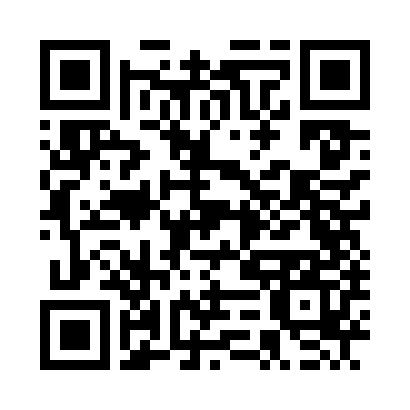